In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "data/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [16]:
# Get first 10000 rows and print some info about columns
train = pd.read_csv("data/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=50000)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  50000 non-null  object        
 1   site_name                  50000 non-null  int64         
 2   posa_continent             50000 non-null  int64         
 3   user_location_country      50000 non-null  int64         
 4   user_location_region       50000 non-null  int64         
 5   user_location_city         50000 non-null  int64         
 6   orig_destination_distance  30998 non-null  float64       
 7   user_id                    50000 non-null  int64         
 8   is_mobile                  50000 non-null  int64         
 9   is_package                 50000 non-null  int64         
 10  channel                    50000 non-null  int64         
 11  srch_ci                    49971 non-null  datetime64[ns]
 12  srch

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

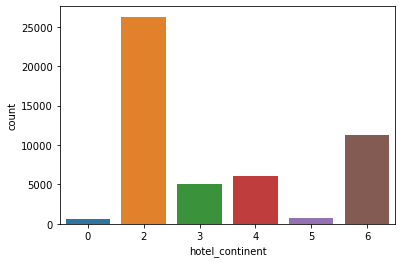

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='hotel_continent', data=train)

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

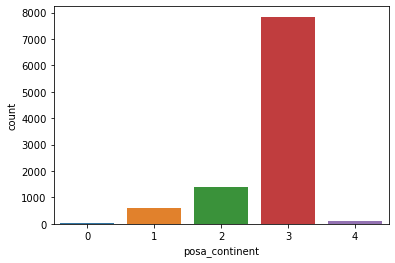

In [7]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(x='posa_continent', data=train)

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

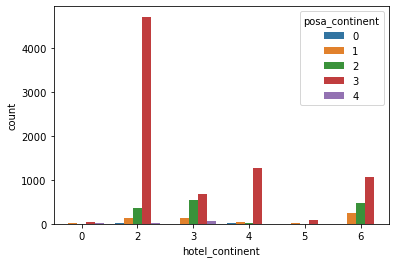

In [8]:
# putting the two above together
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

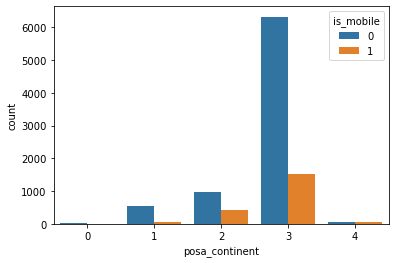

In [9]:
# how many people by continent are booking from mobile
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

c:\users\safar\documents\github\safarie1103\bellevue university\courses\dsc630\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\safar\documents\github\safarie1103\bellevue university\courses\dsc630\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


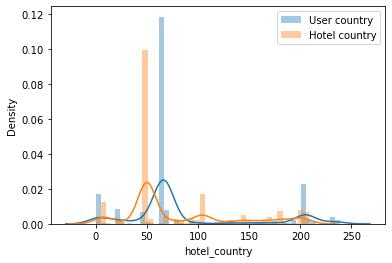

In [10]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

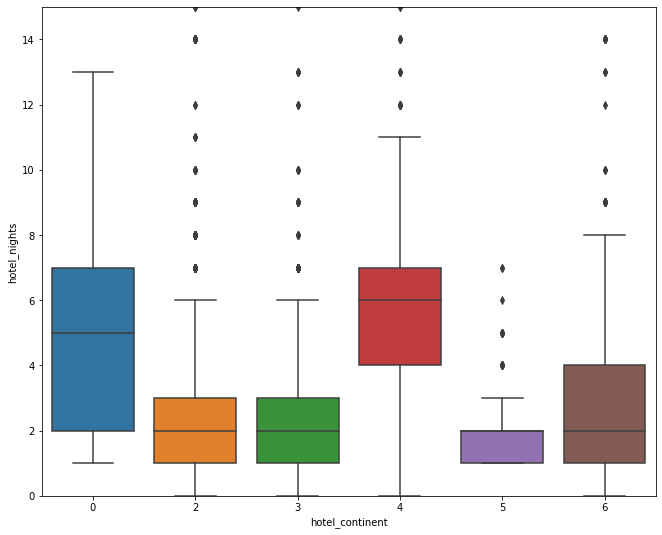

In [11]:
import numpy as np
# get number of booked nights as difference between check in and check out
hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

<AxesSubplot:xlabel='hotel_nights', ylabel='count'>

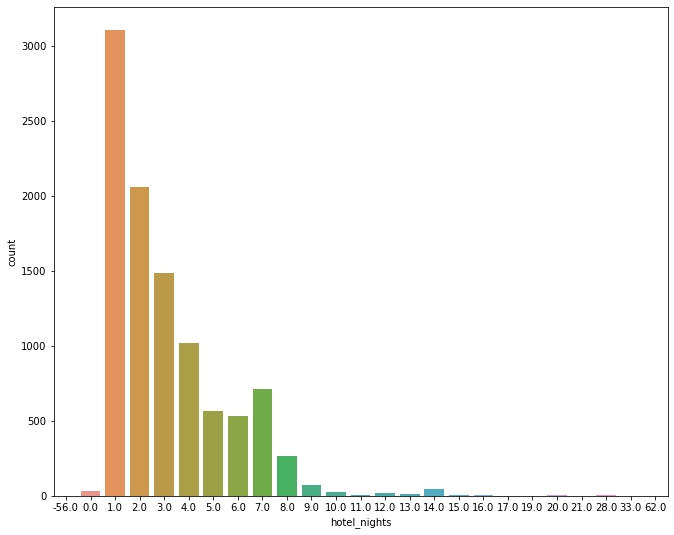

In [12]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

c:\users\safar\documents\github\safarie1103\bellevue university\courses\dsc630\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


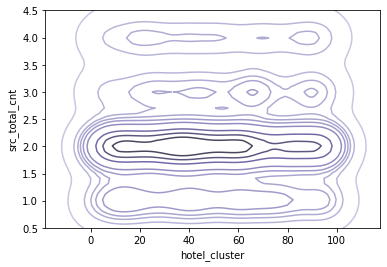

In [13]:
# distribution of the total number of people per cluster
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
ax = sns.kdeplot(train['hotel_cluster'], train['src_total_cnt'], cmap="Purples_d")
lim = ax.set(ylim=(0.5, 4.5))

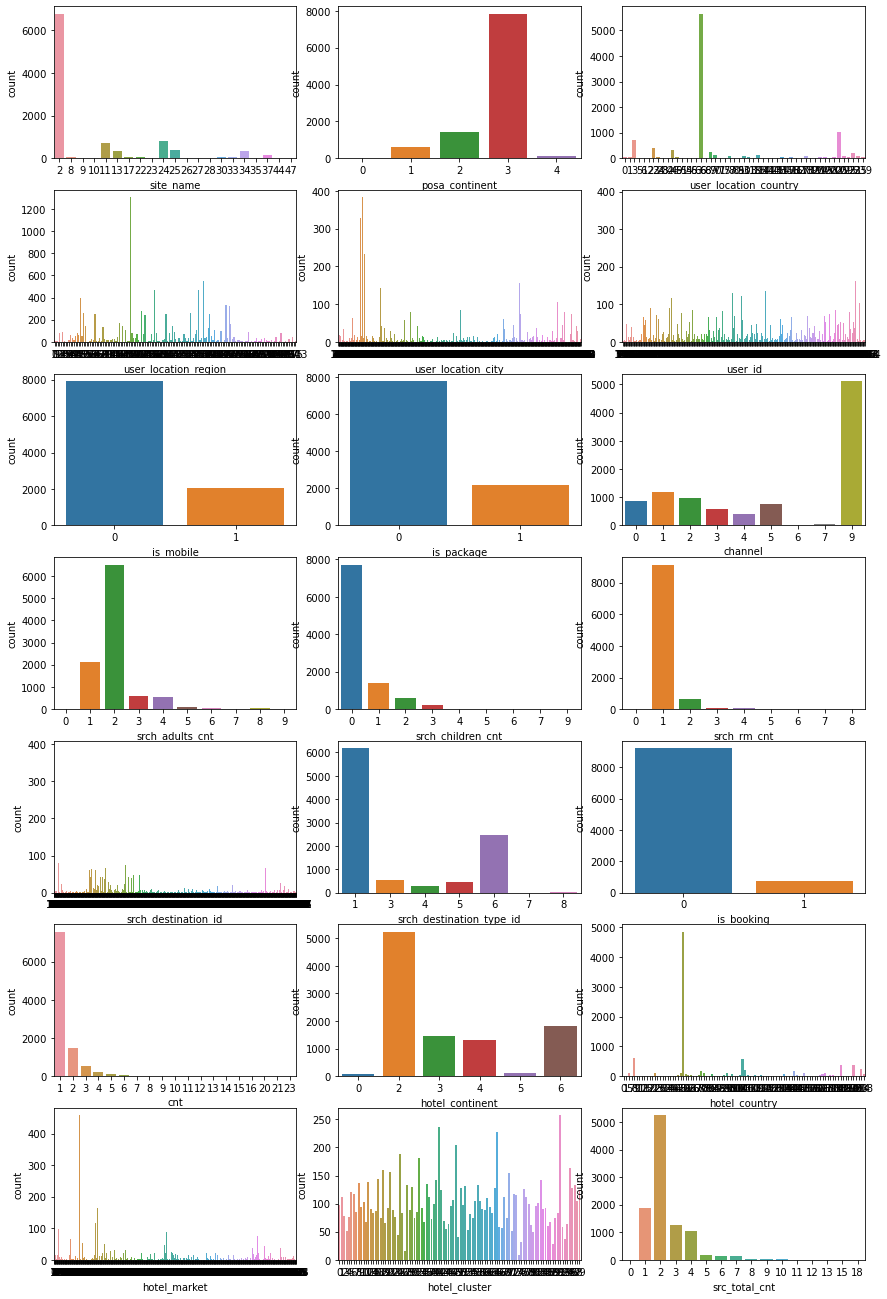

In [14]:
# plot all columns countplots
import numpy as np
rows = train.columns.size//3 - 1
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(12,18))
fig.tight_layout()
i = 0
j = 0
for col in train.columns:
    if j >= 3:
        j = 0
        i += 1
    # avoid to plot by date    
    if train[col].dtype == np.int64:
        sns.countplot(x=col, data=train, ax=axes[i][j])
        j += 1